In [38]:
pip install tensorflow==2.9.0

Note: you may need to restart the kernel to use updated packages.


In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [41]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

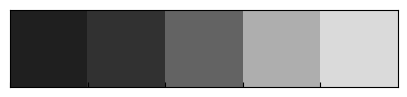

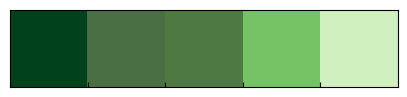

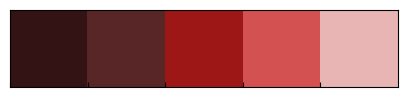

In [42]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [43]:
labels = ['glioma','notumor','meningioma','pituitary']

In [44]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-mri-dataset','Training',i)
    print(folderPath)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-mri-dataset','Testing',i)
    print(folderPath)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

../input/brain-tumor-mri-dataset/Training/glioma


100%|██████████| 1321/1321 [00:03<00:00, 375.65it/s]


../input/brain-tumor-mri-dataset/Training/notumor


100%|██████████| 1595/1595 [00:03<00:00, 431.37it/s]


../input/brain-tumor-mri-dataset/Training/meningioma


100%|██████████| 1339/1339 [00:04<00:00, 319.74it/s]


../input/brain-tumor-mri-dataset/Training/pituitary


100%|██████████| 1457/1457 [00:04<00:00, 318.97it/s]


../input/brain-tumor-mri-dataset/Testing/glioma


100%|██████████| 300/300 [00:00<00:00, 372.06it/s]


../input/brain-tumor-mri-dataset/Testing/notumor


100%|██████████| 405/405 [00:00<00:00, 512.85it/s]


../input/brain-tumor-mri-dataset/Testing/meningioma


100%|██████████| 306/306 [00:00<00:00, 378.19it/s]


../input/brain-tumor-mri-dataset/Testing/pituitary


100%|██████████| 300/300 [00:00<00:00, 347.71it/s]


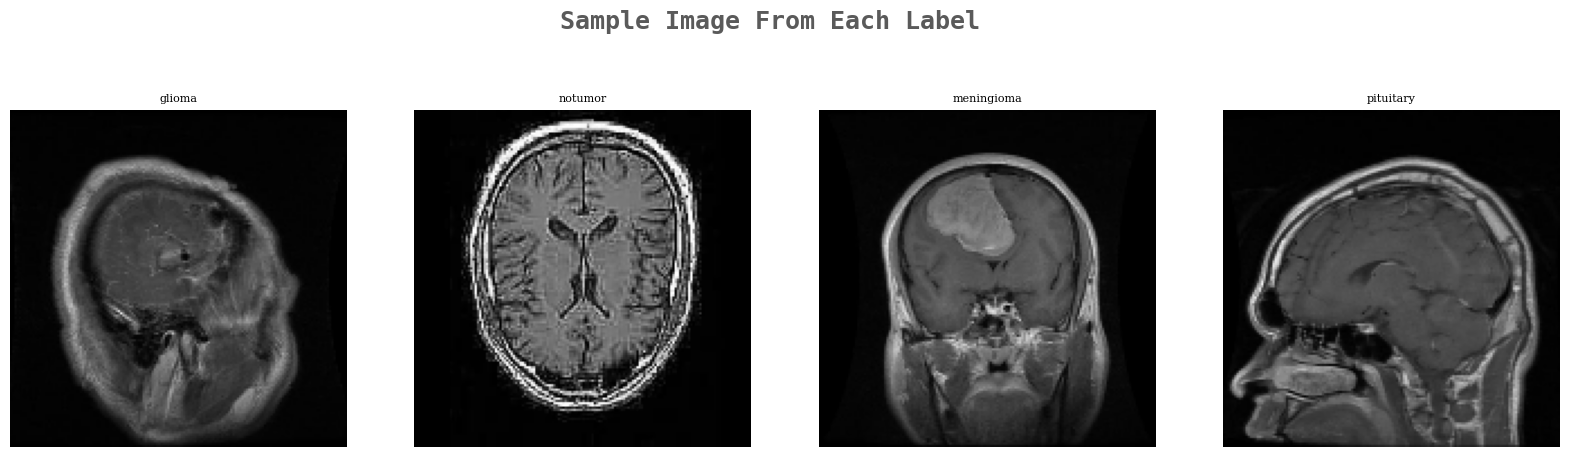

In [45]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [46]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [47]:
X_train.shape

(7023, 150, 150, 3)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=101)

In [49]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.utils import plot_model

In [51]:
# Define your model architecture
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [52]:
# Compile the model
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

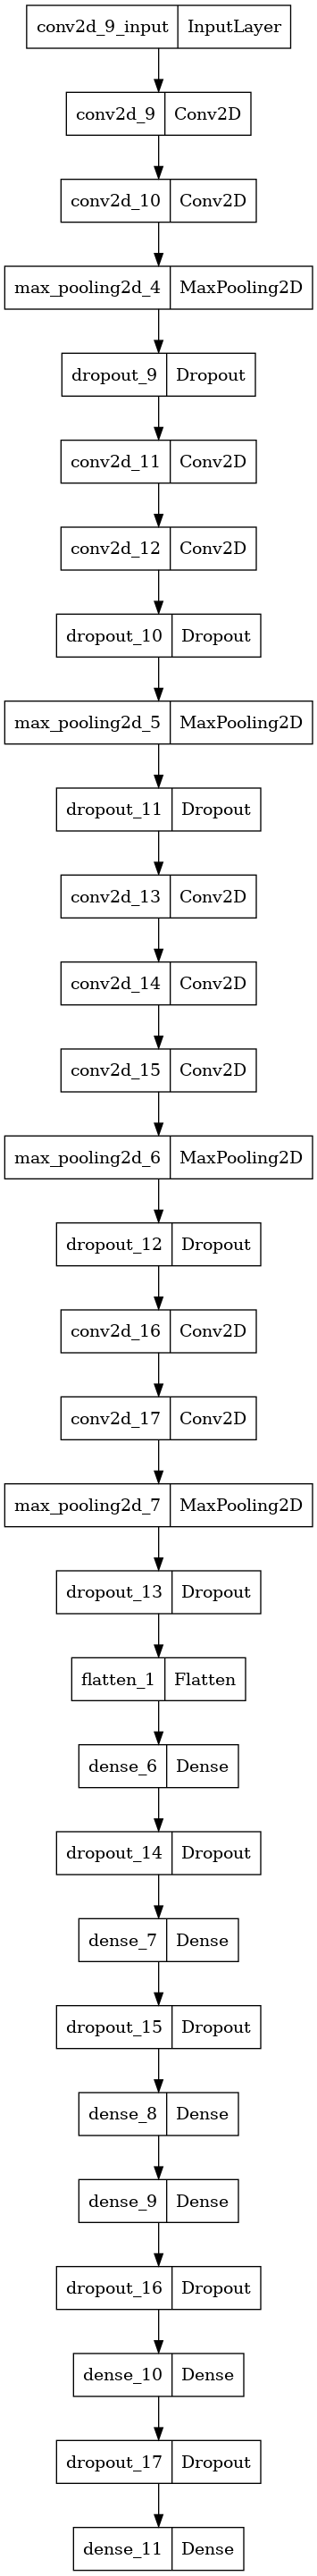

In [53]:
plot_model(model)

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [55]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
178/178 [==============================] - 9s 45ms/step - loss: 1.2691 - accuracy: 0.3806 - val_loss: 1.0851 - val_accuracy: 0.5696
Epoch 2/100
178/178 [==============================] - 8s 44ms/step - loss: 0.8409 - accuracy: 0.6480 - val_loss: 1.1604 - val_accuracy: 0.5459
Epoch 3/100
178/178 [==============================] - 8s 44ms/step - loss: 0.6289 - accuracy: 0.7333 - val_loss: 0.7052 - val_accuracy: 0.7025
Epoch 4/100
178/178 [==============================] - 8s 44ms/step - loss: 0.5432 - accuracy: 0.7653 - val_loss: 0.5672 - val_accuracy: 0.7358
Epoch 5/100
178/178 [==============================] - 8s 44ms/step - loss: 0.4637 - accuracy: 0.8089 - val_loss: 0.5326 - val_accuracy: 0.7769
Epoch 6/100
178/178 [==============================] - 8s 44ms/step - loss: 0.4056 - accuracy: 0.8342 - val_loss: 0.5504 - val_accuracy: 0.7737
Epoch 7/100
178/178 [==============================] - 8s 44ms/step - loss: 0.3241 - accuracy: 0.8775 - val_loss: 0.4194 - val_accuracy:

In [56]:
# Save Model

model.save("model.h5")

In [57]:
# Load a previously saved model
model = tf.keras.models.load_model("model.h5")

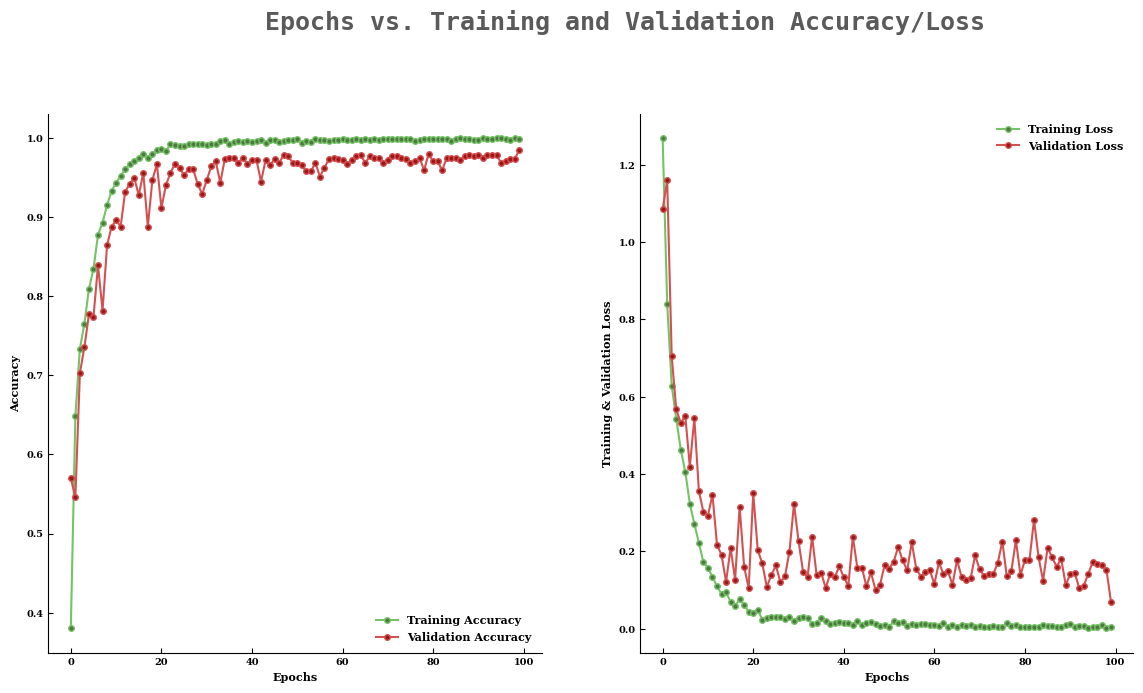

In [58]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

epochs = [i for i in range(100)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()


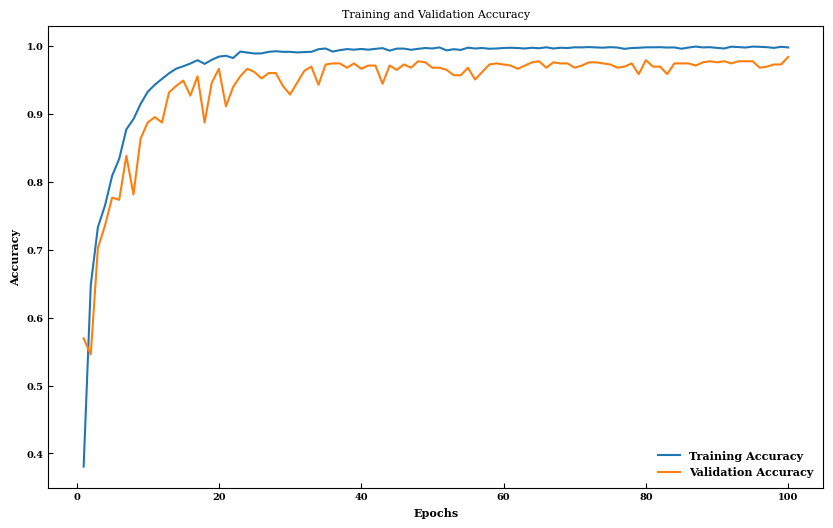

In [59]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs for x-axis
epochs_range = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('accuracy_curve2.png')
plt.show()


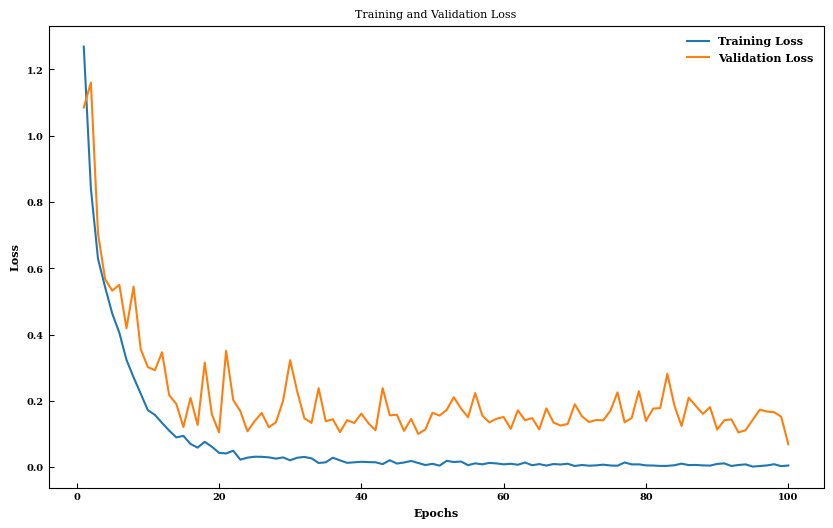

In [60]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs for x-axis
epochs_range = range(1, len(train_loss) + 1)

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Save the plot as an image file (e.g., PNG)
plt.savefig('loss_curve2.png')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


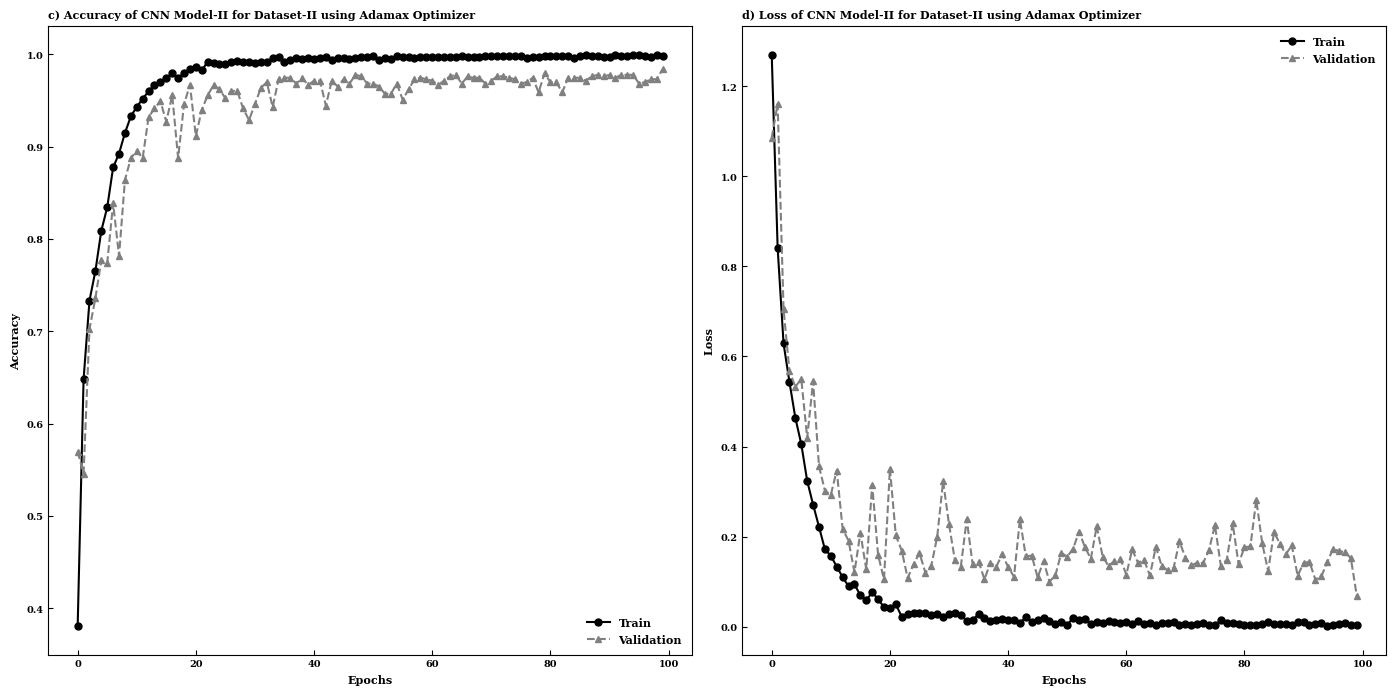

In [61]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(14, 7))  # Increase figsize for a larger plot

# Subplot 1: Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_accuracy'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('c) Accuracy of CNN Model-II for Dataset-II using Adamax Optimizer', loc='left', weight='bold')

# Subplot 2: Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_loss'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
plt.title('d) Loss of CNN Model-II for Dataset-II using Adamax Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performance.png", dpi=1000, bbox_inches='tight')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


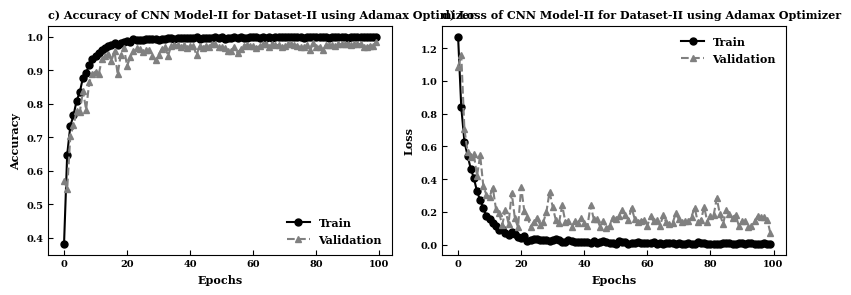

In [62]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(8, 3))  # Increase figsize for a larger plot

# Subplot 1: Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_accuracy'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('c) Accuracy of CNN Model-II for Dataset-II using Adamax Optimizer', loc='left', weight='bold')

# Subplot 2: Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_loss'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
plt.title('d) Loss of CNN Model-II for Dataset-II using Adamax Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performance2.png", bbox_inches='tight')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


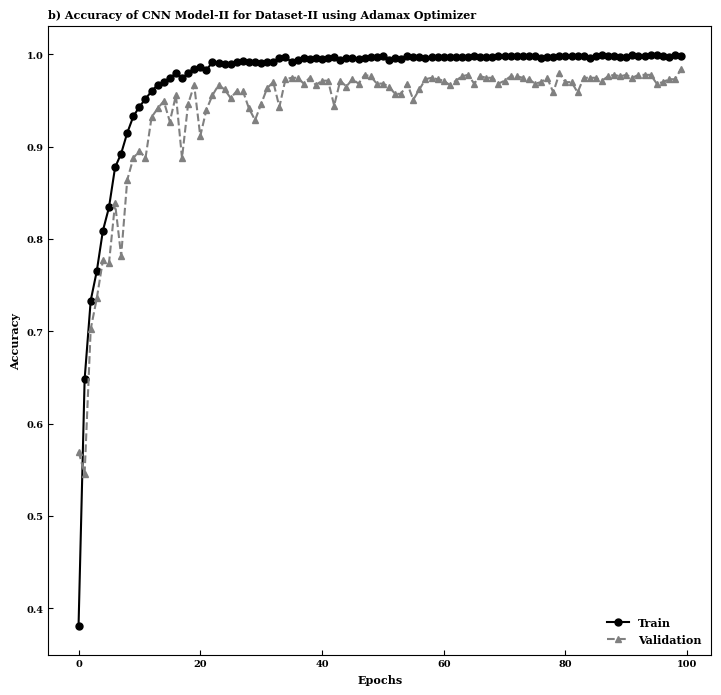

In [63]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(14, 7))  # Increase figsize for a larger plot

# Subplot 1: Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_accuracy'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('b) Accuracy of CNN Model-II for Dataset-II using Adamax Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performance_accuracy.png", dpi=1000, bbox_inches='tight')
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


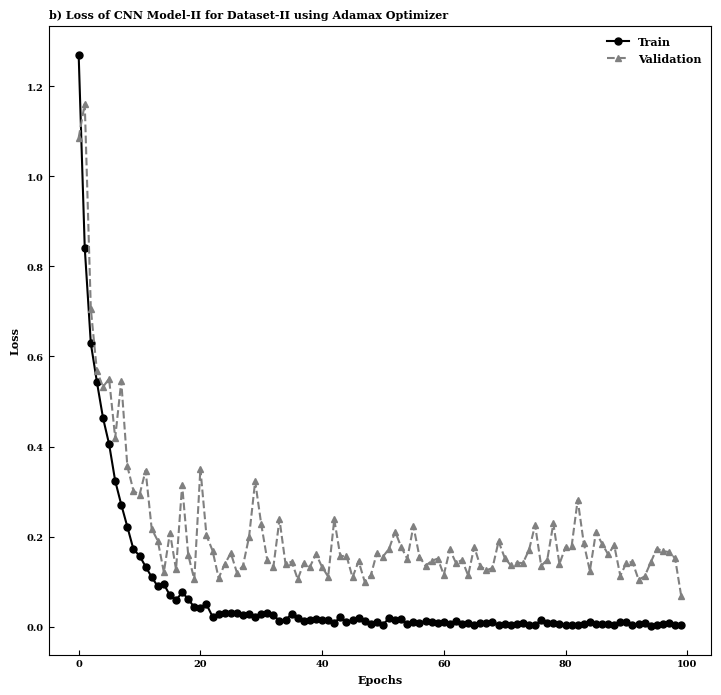

In [64]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(14, 7))  # Increase figsize for a larger plot


# Subplot 2: Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_loss'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
plt.title('b) Loss of CNN Model-II for Dataset-II using Adamax Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performanceloss.png", dpi=1000, bbox_inches='tight')
plt.show()

In [65]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

22/22 [==============================] - 0s 13ms/step


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       170
           1       1.00      0.98      0.99       203
           2       0.97      0.97      0.97       174
           3       0.95      1.00      0.97       156

    accuracy                           0.98       703
   macro avg       0.98      0.98      0.98       703
weighted avg       0.98      0.98      0.98       703



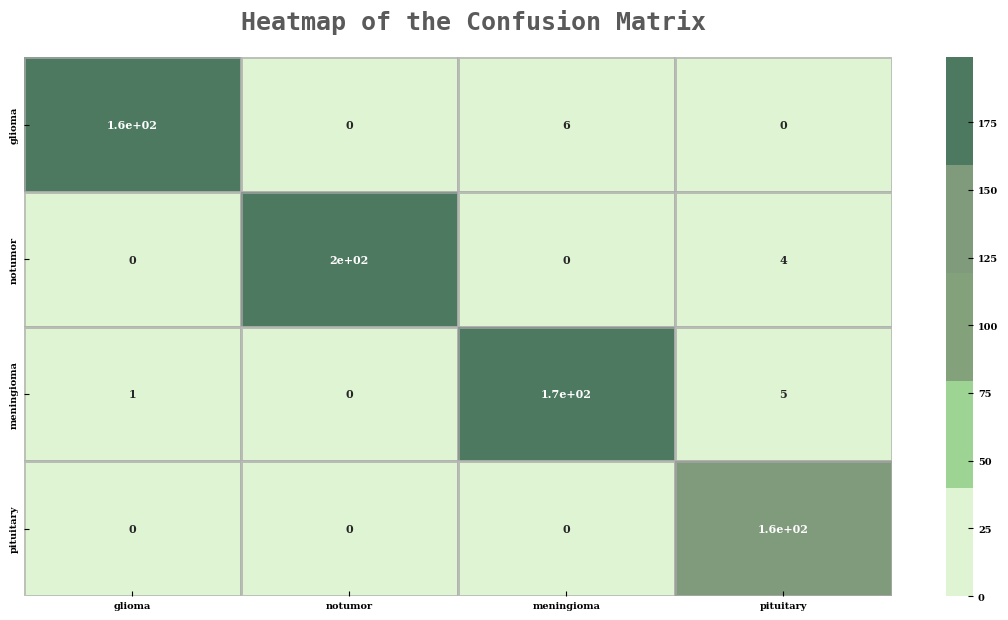

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test_new, pred)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(conf_mat, ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.92, x=0.28, alpha=0.8)

plt.show()


In [68]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


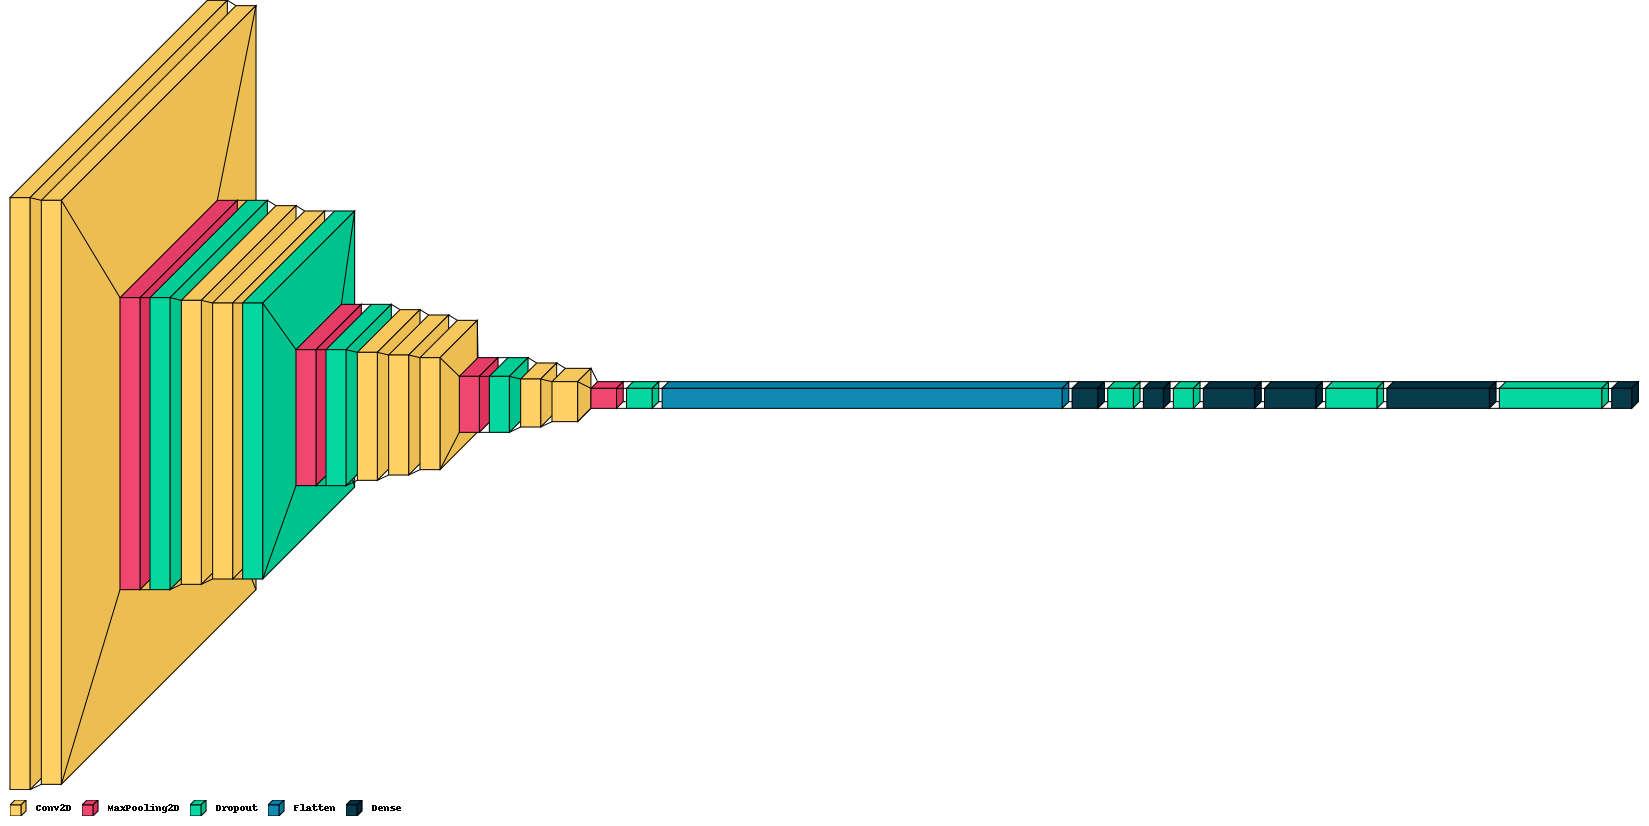

In [69]:
import visualkeras
from IPython.display import display

# Visualize the model's architecture
architecture_viz = visualkeras.layered_view(model, legend=True)

# Save the visualization as an image file (e.g., PNG)
architecture_viz.save('architecture.png')

# Display the visualization within the notebook
display(architecture_viz)

22/22 [==============================] - 0s 13ms/step


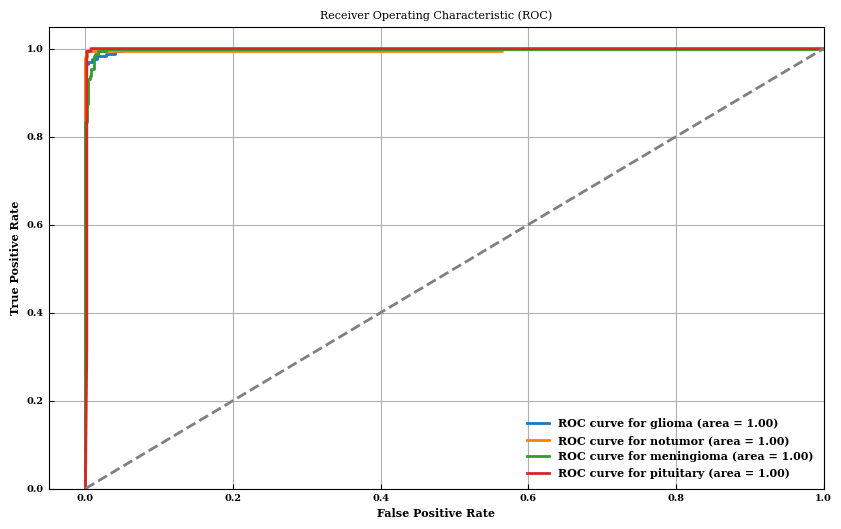

In [70]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path  # Import Path from pathlib
from os.path import join
from os import listdir

import sklearn.preprocessing as sp
import sklearn.metrics as sm

# Make predictions using your model (you've already done this)
pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = sm.roc_curve(y_test[:, i], pred_prob[:, i])
    roc_auc[i] = sm.auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
rcParams['font.size'] = 14  # Increase font size

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for {labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='0.5', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

22/22 [==============================] - 0s 13ms/step


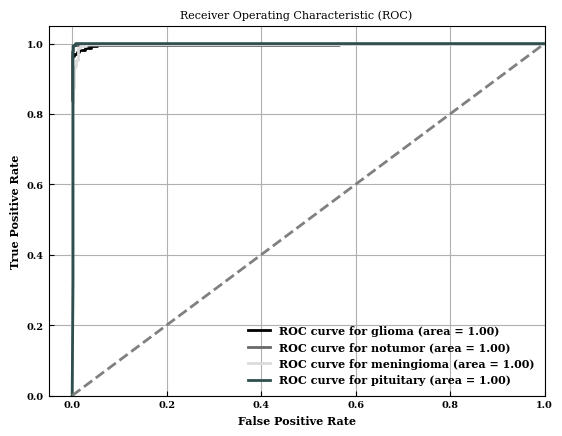

In [71]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import join
from os import listdir

import sklearn.preprocessing as sp
import sklearn.metrics as sm

# Make predictions using your model (you've already done this)
pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(labels)

# Define colors for each class
class_colors = {
    'glioma': 'black',
    'notumor': 'DimGray',
    'meningioma': 'Gainsboro',
    'pituitary': 'DarkSlateGray'
}

for i, class_label in enumerate(labels):
    fpr[i], tpr[i], _ = sm.roc_curve(y_test[:, i], pred_prob[:, i])
    roc_auc[i] = sm.auc(fpr[i], tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        lw=2,
        label=f'ROC curve for {class_label} (area = {roc_auc[i]:.2f})',
        color=class_colors[class_label]  # Use the color from the class_colors dictionary
    )

plt.plot([0, 1], [0, 1], color='0.5', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.grid(True)
plt.legend(loc='lower right')

# Save the figure to a file (change the filename and format as needed)
plt.savefig('roc_curve2.png')

plt.show()

In [72]:
!zip -r file.zip /kaggle/working

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/performanceloss.png (deflated 33%)
updating: kaggle/working/model.png (deflated 21%)
updating: kaggle/working/accuracy_curve2.png (deflated 10%)
updating: kaggle/working/model.h5 (deflated 8%)
updating: kaggle/working/performance2.png (deflated 9%)
updating: kaggle/working/performance_accuracy.png (deflated 38%)
updating: kaggle/working/loss_curve2.png (deflated 8%)
updating: kaggle/working/roc_curve2.png (deflated 13%)
updating: kaggle/working/architecture.png (deflated 14%)
updating: kaggle/working/.virtual_documents/ (stored 0%)
updating: kaggle/working/performance.png (deflated 37%)


In [73]:
!ls

accuracy_curve2.png  model.h5	       performance_accuracy.png
architecture.png     model.png	       performanceloss.png
file.zip	     performance.png   roc_curve2.png
loss_curve2.png      performance2.png


In [74]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip